In [1]:
import pandas as pd
from io import StringIO
import io
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder
import ast
from tensorflow.keras import layers
import keras
#Imports

In [2]:
df=pd.read_excel('legit_ones_5l_vectors.xlsx')
# excel table of vectors only for the legitimate idiomatic expressions. 
#Where there is an exact match of the idiom in the contexts column and idiom column.

In [3]:
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
#Converting the label i and l denoting idom and literal, to zero and 1 for ease of classificstion

In [4]:
# max lenth of is 45 for idioms
r=[]
for i in range(df.shape[0]):
    x = ast.literal_eval(df['all_idiom_5l_each_word'][i])
    r.append(x)
#Converting string list into list, wrong type would cause an error.

In [5]:
for j in range(len(r)):
    for i in range(45-len(r[j])):
        r[j].append(0)
#Addition of zeros after the 45-th layer

In [6]:
data1=pd.concat([pd.DataFrame(r),pd.DataFrame(list(df['label']),columns=['y'])],axis=1)
data1
#Displaying the vector data

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,y
0,0.706041,-2.400280,1.441445,-1.572476,3.178705,-0.989343,-2.965439,-1.656484,-0.818308,2.228827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-2.911975,0.466270,-0.744243,-1.081924,-2.690621,-1.982522,-1.727190,-2.760475,-1.732051,-0.339831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.264573,0.961804,3.210402,-0.762324,0.473270,-2.267075,-0.246786,2.582364,0.359696,0.347087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3.912891,0.240082,2.398815,0.254071,0.138524,1.709964,0.659743,0.193390,0.474542,2.163204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.461462,-0.827581,-1.058371,-2.533165,2.605412,-2.262347,5.604730,-0.617172,0.278911,0.153157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24805,-1.573374,4.653001,1.094262,-2.634780,2.059686,0.240416,0.289104,-0.246852,-0.731543,0.361849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24806,0.197703,2.343588,2.757625,-0.619617,1.132591,0.914919,0.469362,3.042929,-0.427493,3.312955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24807,-2.161072,2.054279,2.774971,1.189215,4.888242,-0.735887,1.086011,2.906706,0.553608,2.586283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24808,4.936450,7.411347,1.970084,-2.220847,-1.292620,0.453957,4.809259,2.020978,-3.288856,-2.603212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
# train_idiom=data1[(data1['y']==0)&(data1.index<20000)].reset_index(drop=True)
# train_idiom.shape


(16742, 46)

In [8]:
# train_literal=data1[(data1['y']==1)&(data1.index<20000)].reset_index(drop=True)
# train_literal_bias=pd.DataFrame()
# train_literal_bias=pd.concat([train_literal_bias,train_literal,train_literal,train_literal,train_literal,train_literal,train_literal[0:452]],axis=0)
# train_literal_bias.shape

(16742, 46)

In [9]:
# train_literal[0:452]

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,y
0,0.200794,1.746465,-2.469869,-2.413901,3.175566,2.754219,3.479995,0.845903,-2.629498,6.356821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-4.471947,0.251455,-0.852516,0.875013,0.907998,-5.074784,-1.981690,-1.358121,1.145342,2.465438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.398004,-1.787525,0.093280,-1.910716,3.612620,-2.922696,-0.794799,-0.683657,2.075389,1.013283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-3.163574,-2.277607,0.512381,-4.007491,-0.503701,-2.844902,-4.045784,-0.653298,-2.134147,0.967743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-1.647244,1.636005,-0.747913,-1.711509,4.521041,0.742066,4.090480,-0.664268,-1.796380,5.209273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-2.845213,3.246986,-0.339011,5.081264,2.669884,-4.743480,4.011475,-1.459684,6.556819,1.923460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
448,-1.996757,0.283110,-1.624118,0.087100,0.498333,-0.903049,2.904166,-0.832911,4.955476,0.796886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
449,-1.657352,2.667484,2.989386,-2.029863,2.197638,-0.436760,-0.626940,3.460732,-0.748058,4.563299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
450,-1.194216,2.536058,1.035588,0.031019,-0.470849,-2.807090,1.284870,-0.393757,0.377447,-0.401311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
# 16742-3258*5

452

In [64]:
train_idiom=data1[(data1['y']==0)&(data1.index<20000)].reset_index(drop=True)[0:3258]
train_literal=data1[(data1['y']==1)&(data1.index<20000)].reset_index(drop=True)[0:3258]
train=pd.concat([train_idiom,train_literal],axis=0).reset_index(drop=True)
train= train.sample(frac = 1).reset_index(drop=True)

test_literal=data1[(data1['y']==1)&(data1.index>20000)].reset_index(drop=True)
test_idiom=data1[(data1['y']==0)&(data1.index>20000)].reset_index(drop=True)[0:769]
test=pd.concat([test_idiom,test_literal],axis=0).reset_index(drop=True)
test=test.sample(frac = 1).reset_index(drop=True)
# Testing and training data split with a ratio of 50:50 for idiom and literal labels.

In [65]:
test_idiom

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,y
0,2.180118,5.013660,2.860423,-2.865401,-0.028288,-3.619290,0.292545,-0.524740,-2.217012,-1.054117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.472042,3.915963,2.068798,-5.190753,0.329500,-3.115555,4.373549,2.080570,-5.787605,-2.315120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.667763,4.113233,0.487150,0.271637,3.015929,0.319480,3.013111,0.576483,0.880548,-2.119671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.120784,-0.306537,2.147649,1.115982,-2.374482,-2.725207,-1.637658,1.236538,-0.551501,-3.421391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-4.884463,-4.142449,1.544765,-2.158188,-2.536783,-2.528181,-2.324859,3.421148,-1.575434,-0.027419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,-2.442063,4.145002,0.046409,-1.669268,-0.617231,-3.632627,-1.634848,0.240459,-2.828122,0.877553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
765,0.669439,-0.016730,0.260739,-1.106865,-0.652408,-2.188516,-0.368060,3.067914,-0.264205,-2.123014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
766,1.013926,3.661481,1.313774,-0.589418,-2.415130,-0.546858,3.171532,-1.222912,3.141354,-1.771899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
767,-0.011871,0.952472,-1.284622,0.115353,0.384778,-0.522033,2.936195,1.016842,-2.286952,-1.036577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [66]:
from sklearn.linear_model import LogisticRegression
x_train=train.iloc[:,:45]
y_train=train['y']
x_test=test.iloc[:,:45]
y_test=test['y']


x_train=np.array(x_train)
x_test=np.array(x_test)
#y-layer is for y_train and x-layer is for x_train. I'm seperating both.
#How? By selecting the first 45 columns for x_train and just the last column for y.

In [67]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
#Converting x_test and x_train into an LSTM standard format

In [68]:
# x_train.shape[2]

45

In [47]:
model = keras.Sequential()
# model.add(keras.Input(shape=(x_train.shape[1],1)))

model.add(keras.Input(shape=(1,x_train.shape[2])))

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation="relu")))

model.add(layers.LSTM(128, name="lstm_layer2"))

# model.add(LSTM(512, activation='exponential'))
model.add(layers.Dense(64, activation='exponential'))

model.add(layers.Dense(30,activation='hard_sigmoid'))

model.add(layers.Dense(10,activation='tanh'))

# model.add(layers.Dense(16,activation='hard_sigmoid'))

# model.add(LSTM(64, activation='exponential'))
# model.add(layers.Dense(10,activation='hard_sigmoid'))
# model.add(layers.Dense(10,activation='tanh'))

model.add(layers.Dense(1,activation='sigmoid'))

print(model.summary())
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

#LSTM Model trained and then used for testing
#100 epochs gives a decent enough score

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 1, 512)           618496    
 nal)                                                            
                                                                 
 lstm_layer2 (LSTM)          (None, 128)               328192    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 30)                1950      
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                      

Epoch 79/100
102/102 - 2s - loss: 0.0417 - accuracy: 0.9874 - 2s/epoch - 17ms/step
Epoch 80/100
102/102 - 2s - loss: 0.0462 - accuracy: 0.9859 - 2s/epoch - 18ms/step
Epoch 81/100
102/102 - 2s - loss: 0.0424 - accuracy: 0.9876 - 2s/epoch - 17ms/step
Epoch 82/100
102/102 - 2s - loss: 0.0463 - accuracy: 0.9862 - 2s/epoch - 17ms/step
Epoch 83/100
102/102 - 2s - loss: 0.0414 - accuracy: 0.9873 - 2s/epoch - 17ms/step
Epoch 84/100
102/102 - 2s - loss: 0.0426 - accuracy: 0.9879 - 2s/epoch - 17ms/step
Epoch 85/100
102/102 - 2s - loss: 0.0499 - accuracy: 0.9836 - 2s/epoch - 17ms/step
Epoch 86/100
102/102 - 2s - loss: 0.0413 - accuracy: 0.9882 - 2s/epoch - 17ms/step
Epoch 87/100
102/102 - 2s - loss: 0.0390 - accuracy: 0.9871 - 2s/epoch - 17ms/step
Epoch 88/100
102/102 - 2s - loss: 0.0367 - accuracy: 0.9886 - 2s/epoch - 17ms/step
Epoch 89/100
102/102 - 2s - loss: 0.0410 - accuracy: 0.9883 - 2s/epoch - 17ms/step
Epoch 90/100
102/102 - 2s - loss: 0.0388 - accuracy: 0.9882 - 2s/epoch - 17ms/step
Epoc

[0.9612648487091064, 0.8062418699264526]

In [48]:
# model = Sequential()
# # model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(1, x_train.shape[1])))
# model.add(layers.Bidirectional(layers.LSTM(500, return_sequences=True, activation="tanh",input_shape=(1, x_train.shape[2]))))
# model.add(LSTM(300, activation='tanh'))
# model.add(Dense(10, activation='sigmoid'))

# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(x_train,y_train, batch_size=32, epochs=10)

In [1]:
o=model.predict(x_test)
#Invoking LSTM's predicting function

NameError: name 'model' is not defined

In [50]:
# round(o[4][0])
# Rounding to the nearest number!

1

In [51]:
Y_prep=[]
for i in range(len(o)):
    Y_prep.append(round(o[i][0]))
# Rounding to the nearest number!

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_prep)
print (confusion_matrix)
#Confusion matrix for plotting the results and calculating the accuracy
#Top left corner is idiom predictions
#Bottom right corner is for literal predictions
#Bottom left and top right are incorrect predictions

[[616 153]
 [145 624]]


In [4]:
print("Percentage correct idiomatic classification : " , 616/(616+153))

Percentage correct idiomatic classification :  0.8010403120936281


In [7]:
print("Percentage correct literal classification : " , 624/(624+145))

Percentage correct literal classification :  0.811443433029909


In [ ]:
print("Percentage correct literal classification : " , 624/(624+145))

In [65]:
print("Overall percentage correct classification : " , (624+616)/(616+153+145+624))

Overall percentage correct classification :  0.8062418725617685


In [61]:
def accuracy_score(confusion_matrix):
    final_score = (confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()
    return final_score
accuracy_score(confusion_matrix)

NameError: name 'confusion_matrix' is not defined

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)
# SVC(random_state=0)
# plot_confusion_matrix(model, Y_prep, y_test)  
# plt.show()

#Imports

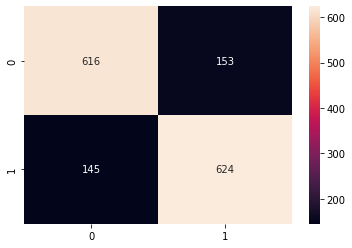

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_prep)
f = sns.heatmap(cm, annot=True, fmt='d')
#Plotting the grapth in a better, more visual way

In [56]:
type(cm)

numpy.ndarray

In [62]:
cm.sum()

1538

In [63]:
(616  + 624)/(confusion_matrix.sum())#Idiomatic

0.8062418725617685

In [ ]:
(718+497)/(769*2)

In [ ]:
601/769

In [ ]:
657/(657+112)

In [ ]:
(641+601)/confusion_matrix.sum()

In [ ]:
(613+616)/(769*2)

In [ ]:
(564+635)/(769*2)

In [ ]:
(657+571)/(769*2)